<a href="https://colab.research.google.com/github/anubasuiit/Data/blob/main/Training_thermalpose.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import cv2 as cv
from google.colab.patches import cv2_imshow # for image display
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import numpy as np
import random
from numpy import argmax

In [3]:
im_size=120
DATADIR = '/content/drive/MyDrive/Colab Notebooks/Train'
CATEGORIES = os.listdir (DATADIR)
print(CATEGORIES)
training_data=[]
C = len(CATEGORIES)

['1', '2', '3']


In [10]:
def create_training_data():
 for category in CATEGORIES:
     class_num=[0] * C 
     path = os.path.join(DATADIR, category)
     class_index = CATEGORIES.index(category)
     class_num[class_index] = 1 #one-hot encoding
     for img in os.listdir(path):
         img_array = cv.imread(os.path.join(path,img), cv.IMREAD_GRAYSCALE)
         new_array=cv.resize(img_array, (im_size, im_size))
         training_data.append([new_array, class_num])
#with tf.device('device:XLA_GPU:0'):
create_training_data()
print(len(training_data))
random.shuffle(training_data)

X=[]
y=[]
for features, labels in training_data:
  X.append(features)
  y.append(labels)

X=np.array(X).reshape(-1,im_size,im_size,1)
X=X/255.0
y=np.array(y)
#y=y.transpose()
print(y)


model = Sequential()
model.add(Conv2D(128,(3,3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(C))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam',  metrics = ['accuracy'])
#X=X.reshape(-1,im_size,im_size,1)
#X=list(X)
model.fit(X, y, batch_size=8, epochs=20, validation_split=0.3)
model.save('/content/drive/MyDrive/Colab Notebooks/Therm_pose.h5')

882
[[1 0 0]
 [0 0 1]
 [0 0 1]
 ...
 [1 0 0]
 [0 0 1]
 [0 1 0]]
Epoch 1/20
78/78 [==============================] - 63s 797ms/step - loss: 1.1099 - accuracy: 0.3323 - val_loss: 1.0990 - val_accuracy: 0.3019
Epoch 2/20
78/78 [==============================] - 62s 793ms/step - loss: 0.8389 - accuracy: 0.5624 - val_loss: 0.2955 - val_accuracy: 0.8717
Epoch 3/20
78/78 [==============================] - 62s 797ms/step - loss: 0.0450 - accuracy: 0.9887 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 4/20
78/78 [==============================] - 62s 796ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 4.7479e-04 - val_accuracy: 1.0000
Epoch 5/20
78/78 [==============================] - 62s 795ms/step - loss: 3.2294e-04 - accuracy: 1.0000 - val_loss: 1.0547e-04 - val_accuracy: 1.0000
Epoch 6/20
78/78 [==============================] - 62s 797ms/step - loss: 5.7490e-05 - accuracy: 1.0000 - val_loss: 3.8111e-05 - val_accuracy: 1.0000
Epoch 7/20
78/78 [==============================] - 62s 79

1625508189144 0014.jpg
1


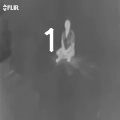

1625508189144 0008.jpg
1


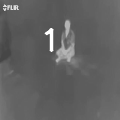

1625508189144 0007.jpg
1


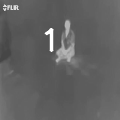

1625508189144 0013.jpg
1


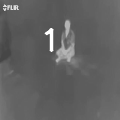

1625508189144 0012.jpg
1


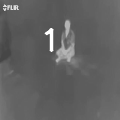

1625508189144 0017.jpg
1


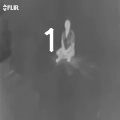

1625508189144 0002.jpg
1


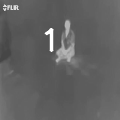

1625508189144 0006.jpg
1


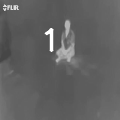

1625508189144 0016.jpg
1


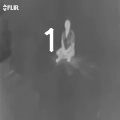

1625508189144 0010.jpg
1


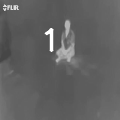

1625508189144 0009.jpg
1


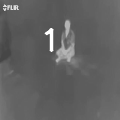

1625508189144 0003.jpg
1


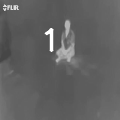

1625508189144 0018.jpg
1


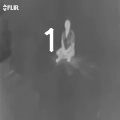

1625508189144 0015.jpg
1


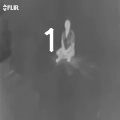

1625508189144 0011.jpg
1


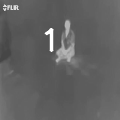

1625508189144 0001.jpg
1


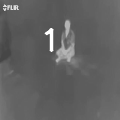

1625508189144 0004.jpg
1


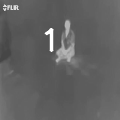

1625508189144 0005.jpg
1


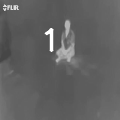

1625508189127 0008.jpg
3


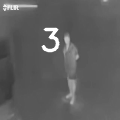

1625508189127 0007.jpg
3


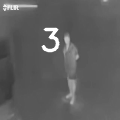

1625508189127 0019.jpg
3


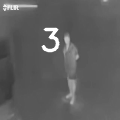

1625508189127 0015.jpg
3


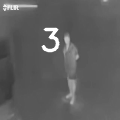

1625508189127 0009.jpg
3


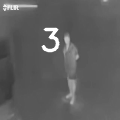

1625508189127 0020.jpg
3


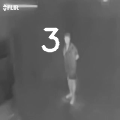

1625508189127 0021.jpg
3


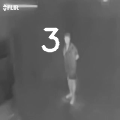

1625508189127 0014.jpg
3


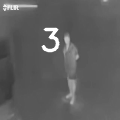

1625508189127 0013.jpg
3


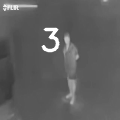

1625508302025 1217.jpg
3


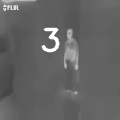

1625508302025 1226.jpg
3


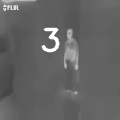

1625508302025 1218.jpg
3


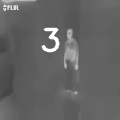

1625508302025 1230.jpg
3


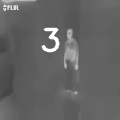

1625508302025 1225.jpg
3


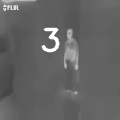

1625508302025 1220.jpg
3


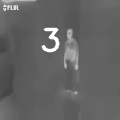

1625508302025 1229.jpg
3


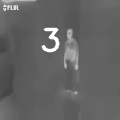

1625508302025 1223.jpg
3


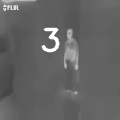

1625508302025 1231.jpg
3


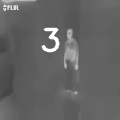

1625508302025 1219.jpg
3


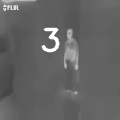

1625508302025 1232.jpg
3


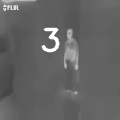

1625508302025 1224.jpg
3


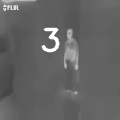

1625508328635 1711.jpg
3


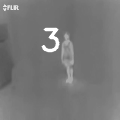

1625508328635 1713.jpg
3


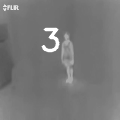

1625508328635 1705.jpg
3


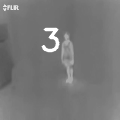

1625508328635 1707.jpg
3


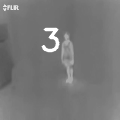

1625508328635 1712.jpg
3


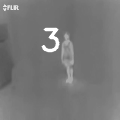

1625508328635 1708.jpg
3


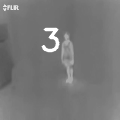

1625508328635 1714.jpg
3


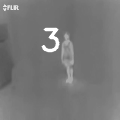

1625508328635 1706.jpg
3


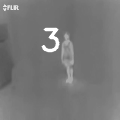

1625508189161 0041.jpg
2


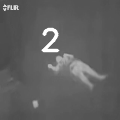

1625508189161 0044.jpg
2


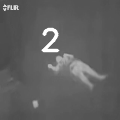

1625508189161 0040.jpg
2


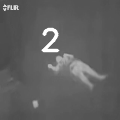

1625508189161 0043.jpg
2


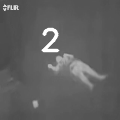

1625508189161 0045.jpg
2


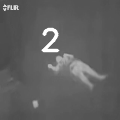

1625508189161 0039.jpg
2


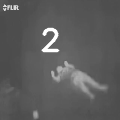

1625508189161 0038.jpg
2


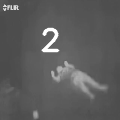

1625508189161 0047.jpg
2


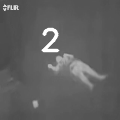

1625508189161 0037.jpg
2


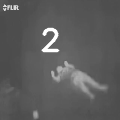

1625508189161 0046.jpg
2


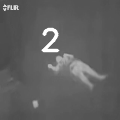

1625508231778 1347.jpg
2


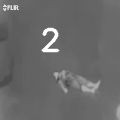

1625508231778 1338.jpg
2


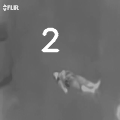

1625508231778 1333.jpg
2


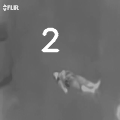

1625508231778 1341.jpg
2


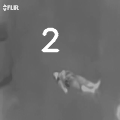

1625508231778 1340.jpg
2


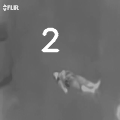

1625508231778 1346.jpg
2


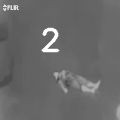

1625508231778 1332.jpg
2


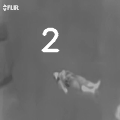

1625508231778 1334.jpg
2


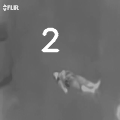

1625508231778 1345.jpg
2


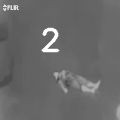

1625508231778 1344.jpg
2


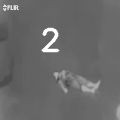

1625508231778 1339.jpg
2


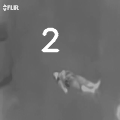

1625508231778 1335.jpg
2


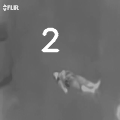

1625508231821 0791.jpg
2


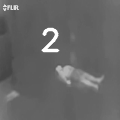

1625508231821 0789.jpg
2


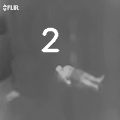

1625508231821 0790.jpg
2


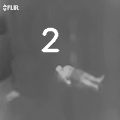

1625508231821 0797.jpg
2


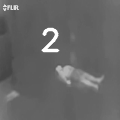

1625508231821 0792.jpg
2


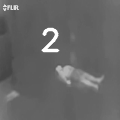

1625508231821 0793.jpg
2


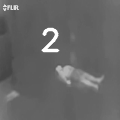

1625508231821 0799.jpg
2


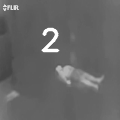

1625508231821 0798.jpg
2


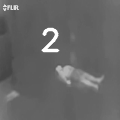

1625508231821 0795.jpg
2


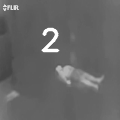

1625508231821 0796.jpg
2


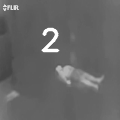

1625508328662 0519.jpg
2


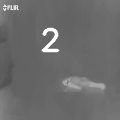

1625508328662 0518.jpg
2


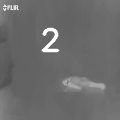

1625508328662 0520.jpg
2


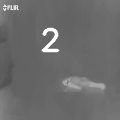

1625508328662 0521.jpg
2


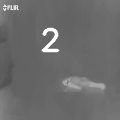

1625508231787 01.jpg
1


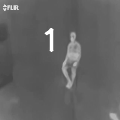

1625508231787 03.jpg
1


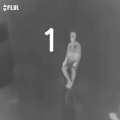

1625508231787 04.jpg
1


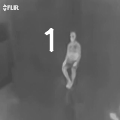

1625508231787 02.jpg
1


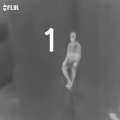

1625508231787 11.jpg
1


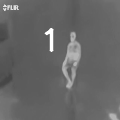

1625508231787 05.jpg
1


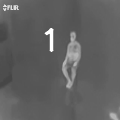

1625508231787 07.jpg
1


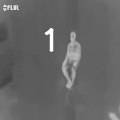

1625508231787 06.jpg
1


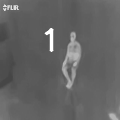

1625508231787 12.jpg
1


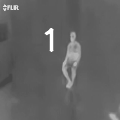

1625508231787 09.jpg
1


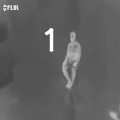

1625508231787 08.jpg
1


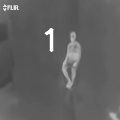

1625508231787 10.jpg
1


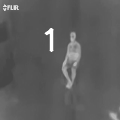

1625508231810 10.jpg
1


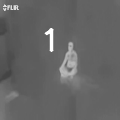

1625508231810 05.jpg
1


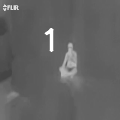

1625508231810 04.jpg
1


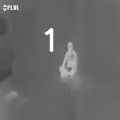

1625508231810 02.jpg
1


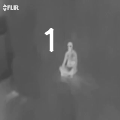

1625508231810 11.jpg
1


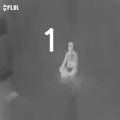

1625508231810 08.jpg
1


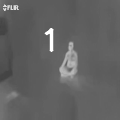

1625508231810 09.jpg
1


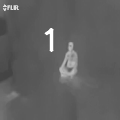

1625508231810 03.jpg
1


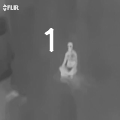

1625508231810 07.jpg
1


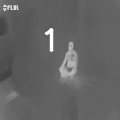

1625508231810 01.jpg
1


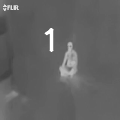

In [6]:
font = cv.FONT_HERSHEY_SIMPLEX
DATADIR = '/content/drive/MyDrive/Colab Notebooks/Train'
CATEGORIES = os.listdir (DATADIR)
files = []
model=tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Therm_pose.h5')
path = '/content/drive/MyDrive/Colab Notebooks/Test'
im_size=120



for file in os.listdir(path):
    if file.endswith(".jpg"):
        print(file)
        frame = cv.imread(os.path.join(path,file),1)
        if frame is None:
            continue
#        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        frame = cv.resize(frame, (im_size, im_size))
        gray = cv.cvtColor(frame,cv.COLOR_BGR2GRAY)
        new_array = gray/255
        new_array = new_array.reshape(-1,im_size,im_size,1)
        random.shuffle(new_array)
        prediction = model.predict([new_array])
        #print(prediction)
        #y = int(prediction[0][0]*2.0)
        text=CATEGORIES[int(argmax(prediction))]
        print(text)
        cv.putText(gray,text,(40,50), font, 1.0,(255,255,255),2,cv.LINE_AA)
        cv2_imshow(gray)
#cv.destroyAllWindows()